In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mean = np.array([4.0,5.0])
cov = np.array([[1.0,0.95],[0.95,1.2]])
data = np.random.multivariate_normal(mean,cov,5000)

In [3]:
data.shape

(5000, 2)

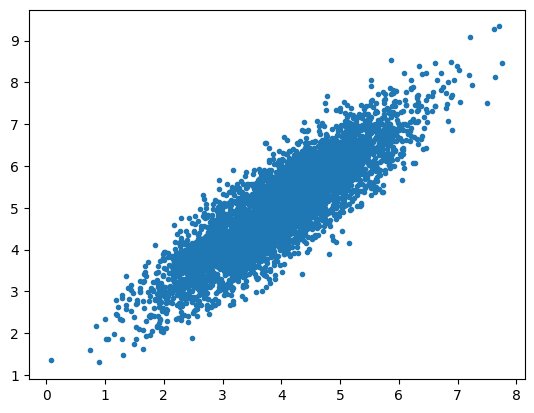

In [4]:
plt.scatter(data[:5000,0],data[:5000,1],marker='.')
plt.show()

In [5]:
ones = np.ones((data.shape[0],1))
data = np.hstack((ones,data))

In [6]:
data

array([[1.        , 3.99497601, 5.44821042],
       [1.        , 3.76876254, 5.23671135],
       [1.        , 3.15478063, 3.62945792],
       ...,
       [1.        , 3.37123972, 4.28649195],
       [1.        , 4.7566612 , 5.60076032],
       [1.        , 3.2029793 , 4.08061721]])

In [7]:
X = data[:,:-1]

In [8]:
Y = data[:,-1].reshape(-1,1)

In [9]:
Y

array([[5.44821042],
       [5.23671135],
       [3.62945792],
       ...,
       [4.28649195],
       [5.60076032],
       [4.08061721]])

In [10]:
X

array([[1.        , 3.99497601],
       [1.        , 3.76876254],
       [1.        , 3.15478063],
       ...,
       [1.        , 3.37123972],
       [1.        , 4.7566612 ],
       [1.        , 3.2029793 ]])

In [11]:
def predict(x,weights):
    y_hat = np.dot(x,weights)
    return y_hat

def gradient(x,y,weights):
    y_pred = predict(x,weights)
    grad = np.dot(x.transpose(),(y_pred-y))
    return grad

def cost(x,y,weights):
    y_pred = predict(x,weights)
    error = np.mean((y-y_pred)**2)
    return error



## mini batch
def create_mini_batch(x,y,batch_size=32):
    mini_batches = []
    data = np.hstack((x,y))
    
    np.random.shuffle(data)
    
    minibatch_count = data.shape[0]
    i = 0
    
    for i in range(minibatch_count+1):
        mini_batch = data[i*batch_size:(i+1)*batch_size,:]
        x_minibatch = mini_batch[:,:-1]
        y_minibatch = mini_batch[:,-1].reshape((-1,1))
        mini_batches.append((x_minibatch,y_minibatch))
    return mini_batches


# mini batch GD

def mini_batch_gradient_decent(x,y,lr=0.0001,batch_size=32,max_iter=10):
    error_list = []
    max_iter = max_iter
    weights = np.zeros((x.shape[1],1))    
    for itr in range(max_iter):
        mini_batchs = create_mini_batch(x,y)
        
        for mini_batch in mini_batchs:
            x_mini,y_mini = mini_batch
            weights = weights - lr*gradient(x_mini,y_mini,weights)
            error = cost(x_mini,y_mini,weights)
            error_list.append(error)
    return weights,error_list

C:\Users\gaura\anaconda3\envs\tf_gpu\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\gaura\anaconda3\envs\tf_gpu\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


w_0 =  [0.79396092]
w_1 =  [[1.05575614]]


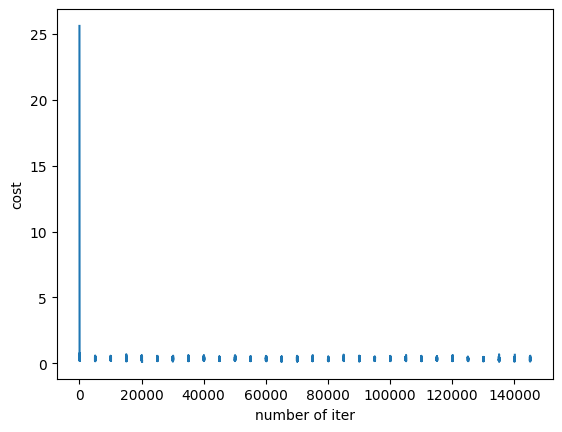

In [12]:
weights,error_list = mini_batch_gradient_decent(X,Y,lr=0.0001,batch_size=1,max_iter=30)
print("w_0 = ", weights[0])
print("w_1 = ", weights[1:])

plt.plot(error_list)
plt.xlabel("number of iter")
plt.ylabel('cost')
plt.show()

# Polynomial Regression

In [13]:
np.random.seed(1)
n = 200
X = np.random.rand(n,1)*2

y = 0.7 * (X**5)- 2.1*(X**4)+2.3*(X**3)+0.2*(X**2)+0.3*(X)+0.4*(np.random.rand(n,1))

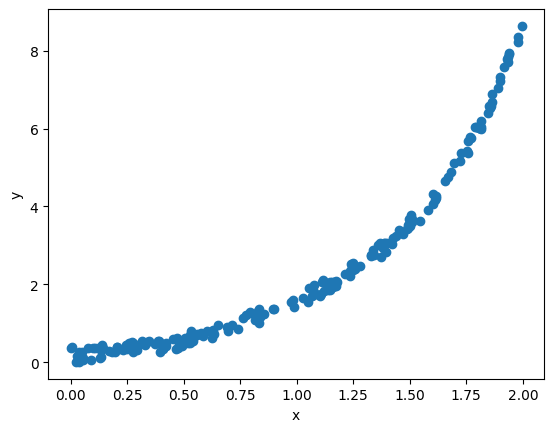

In [14]:
plt.scatter(X,y)
# print(X[:100])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

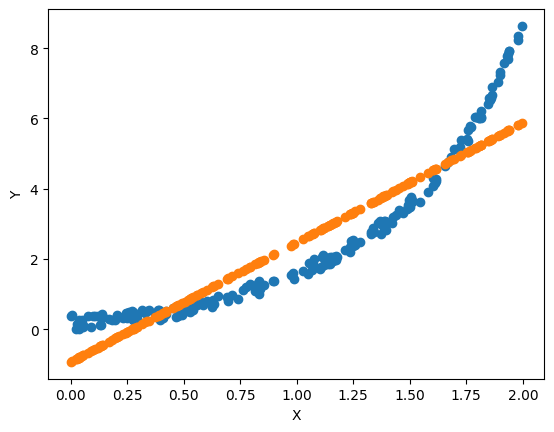

0.8473246890807338


In [17]:
model = LinearRegression()
model.fit(X,y)
output = model.predict(X)
plt.scatter(X,y,label='sample')
plt.scatter(X,output,label='prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(model.score(X,y))

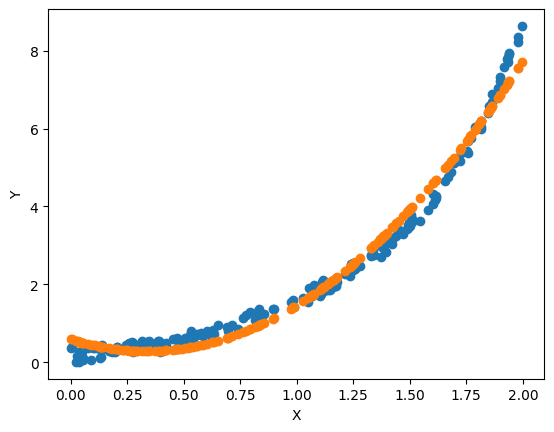

0.9838894172955047


In [20]:
model = LinearRegression()
X_deg2 = np.hstack([X,X**2])
model.fit(X_deg2,y)
output = model.predict(X_deg2)
plt.scatter(X,y,label='sample')
plt.scatter(X,output,label='prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(model.score(X_deg2,y))

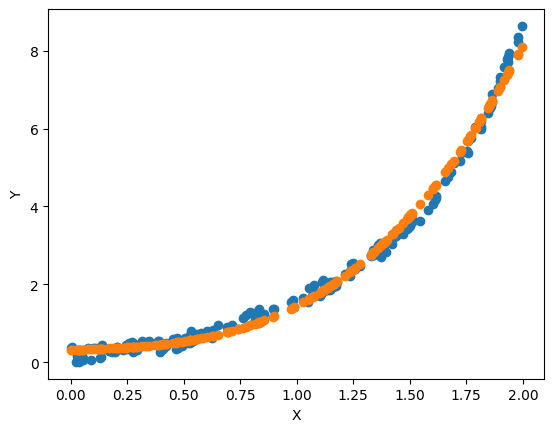

0.9937387546396313


In [25]:
model = LinearRegression()
X_deg3 = np.hstack([X,X**3])
model.fit(X_deg3,y)
output = model.predict(X_deg3)
plt.scatter(X,y,label='sample')
plt.scatter(X,output,label='prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(model.score(X_deg3,y))

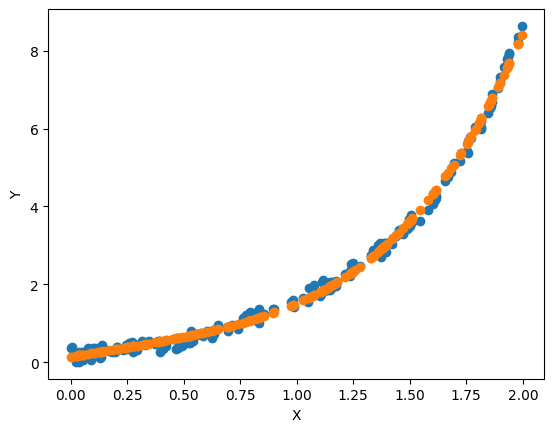

0.9967006983865837


In [26]:
model = LinearRegression()
X_deg2 = np.hstack([X,X**4])
model.fit(X_deg2,y)
output = model.predict(X_deg2)
plt.scatter(X,y,label='sample')
plt.scatter(X,output,label='prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(model.score(X_deg2,y))

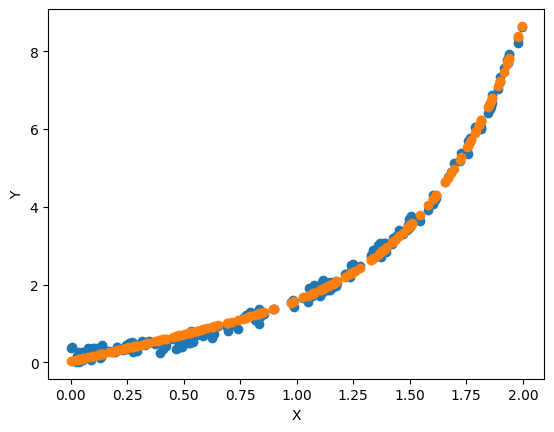

0.9964768329959279


In [23]:
model = LinearRegression()
X_deg2 = np.hstack([X,X**5])
model.fit(X_deg2,y)
output = model.predict(X_deg2)
plt.scatter(X,y,label='sample')
plt.scatter(X,output,label='prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(model.score(X_deg2,y))